# Algorithm Analysis
## Objectives
1. Temporal Complexity of Algorithms
2. Big-O 
3. Compare Algorithms
4. Best and Worst cases of Algo's

## Algorithm Performance
- Temporal Complexity: Estimate time required.
- Spacial Complexity: Estimate principal memory used.

### Empirical Analysis
Sum of the first N numbers example

In [6]:
import time

import numpy as np
import matplotlib.pyplot as plt 

plt.style.use(["science", "notebook", "grid"])

In [7]:
def runtime(func):
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = func(*args, **kwargs)
        dt = time.time() - t1
        return dt
    return wrapper

In [8]:
@runtime
def sum_for_loop(N: int):
    result = 0
    for i in range(1, N+1):
        result += i
    return result


@runtime
def sum_built_in(N: int):
    return sum(range(1, N+1))


@runtime
def sum_recursive(N: int):

    if N == 0:
        return 0
    
    result = N + sum_recursive(N-1)

    return result


# cache = {}
# @runtime
# def sum_memoization(N: int):
#     if N == 0:
#         return 0
    
#     if N in cache:
#         return cache[N]
    
#     result = N + sum_memoization(N-1)

#     cache[N] = result

#     return result


@runtime
def sum_gauss(N: int):
    return 0.5 * N * (N + 1)


test_functions = {
    "For Loop": np.vectorize(sum_for_loop),
    "Built-in": np.vectorize(sum_built_in),
    # "Recursion": np.vectorize(sum_recursive),     # Max-Recursion Depth Reached
    # "Memoization": np.vectorize(sum_memoization), # Space complexity ^
    "Gauss": np.vectorize(sum_gauss)
    }

In [11]:
exp_max = 9

N = np.array([pow(10, i) for i in range(1, exp_max+1)])

function_times = {}

for key, func in test_functions.items():

   function_times[key] = func(N)

   print(f"Execution of '{key}' finished.")

    # cache.clear()   # clear cache of memoization function

Execution of 'For Loop' finished.
Execution of 'Built-in' finished.
Execution of 'Gauss' finished.


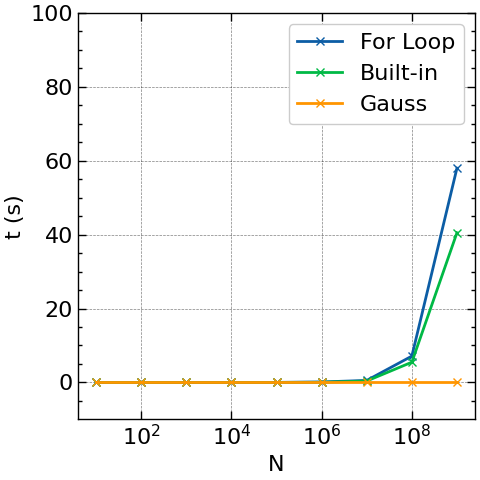

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for key, value in function_times.items():
    ax.plot(N, value, "x-", label=key)

ax.set_xlabel("N")
ax.set_xticks(N)
ax.set_xscale("log")

ax.set_ylabel("t (s)")
ax.set_ylim([-10, 100])

plt.tight_layout()
plt.legend()
plt.show()

### Theoretical Analysis 
Pseudo-code instead of algorithm implementation.
The objective is to obtaine the function that represents the number of need operations given an input of size $n$:  $T(n)$.
#### Components of any Algorithm
- Primitive operations (variable assignment, array indexing, return avalue, arithmetic operations, logical evaluations, etc.). They have a constant value that do not depend on input size.

    ```python
    return vector[3] + vector[5]
    ```
    This represent 1 (return) + 1 (indexing) + 1 (sum) + 1 (indexing) 4 operations
- Loop operations: Number of times the inner block of the loop is executed.

    ```python
    while condition:
        B1

    for condition:
        B2
    ```
    $T_{loop}(n) = T(B_i) \cdot (\text{number of iterations})$

    ```python
    for i in range(1, n+1):
        result += i
    ```
    $T(N) = 2 \cdot n$

    ```python
    for i in range(n):
        for j in range(n):
            print(i*j)
    ```
    $T(n) = (2 \cdot n) \cdot n = 2 \cdot n^2$

    If there were two loops with different number of iterations we approximate with $n = \max (n_1, n_2, ...)$

    If only one of the blocks will be executed (if-else) then we approximate with $T_B = \max (T(B_1), T(B_2), ...)$

    ### Analysis of Sum Previous Example:
    ```python
    def sum_for_loop(N: int):
        result = 0
        for i in range(1, N+1):
            result += i
        return result
    ```
    $T(N) = 2 + 2 \cdot N$

    ```python
    def sum_built_in(N: int):
        return sum(range(1, N+1))
    ```
    $T(N) = 1 + 1 \cdot N$

    ```python
    def sum_gauss(N: int):
        return 0.5 * N * (N + 1)
    ```
    $T(N) = 4$
    
    Which matches perfectly with our experimental results above!

### Asymptotic Analysis
AKA Big O analysis
- $T(n) = 5n^2 + 27n \rightarrow \mathcal{O} (n^2)$
- $T(n) = 5n! + 27n \rightarrow \mathcal{O} (n!)$

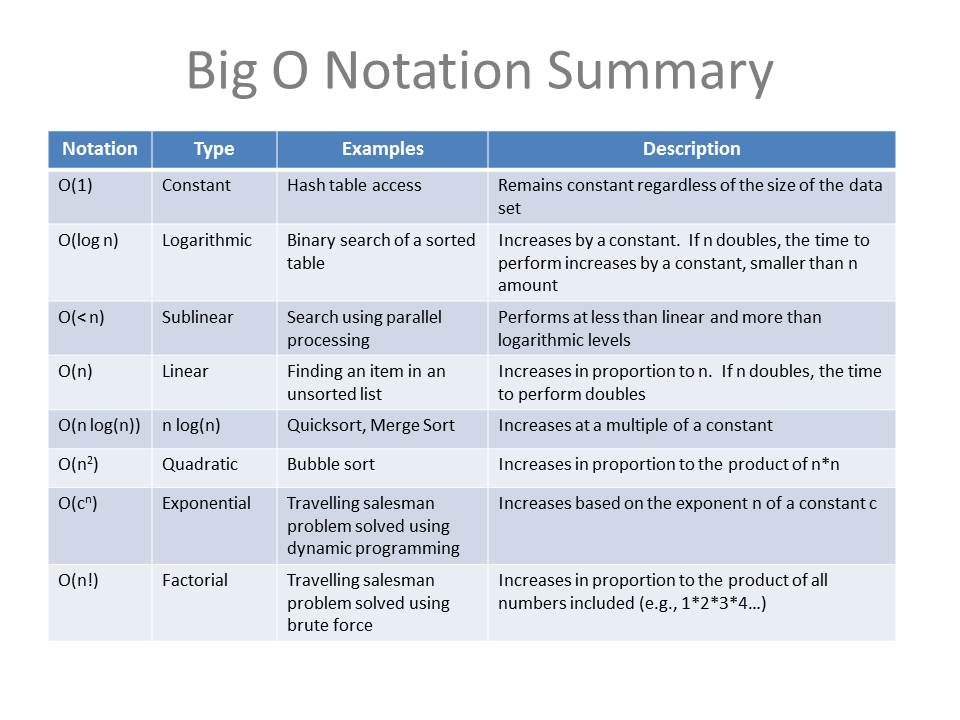

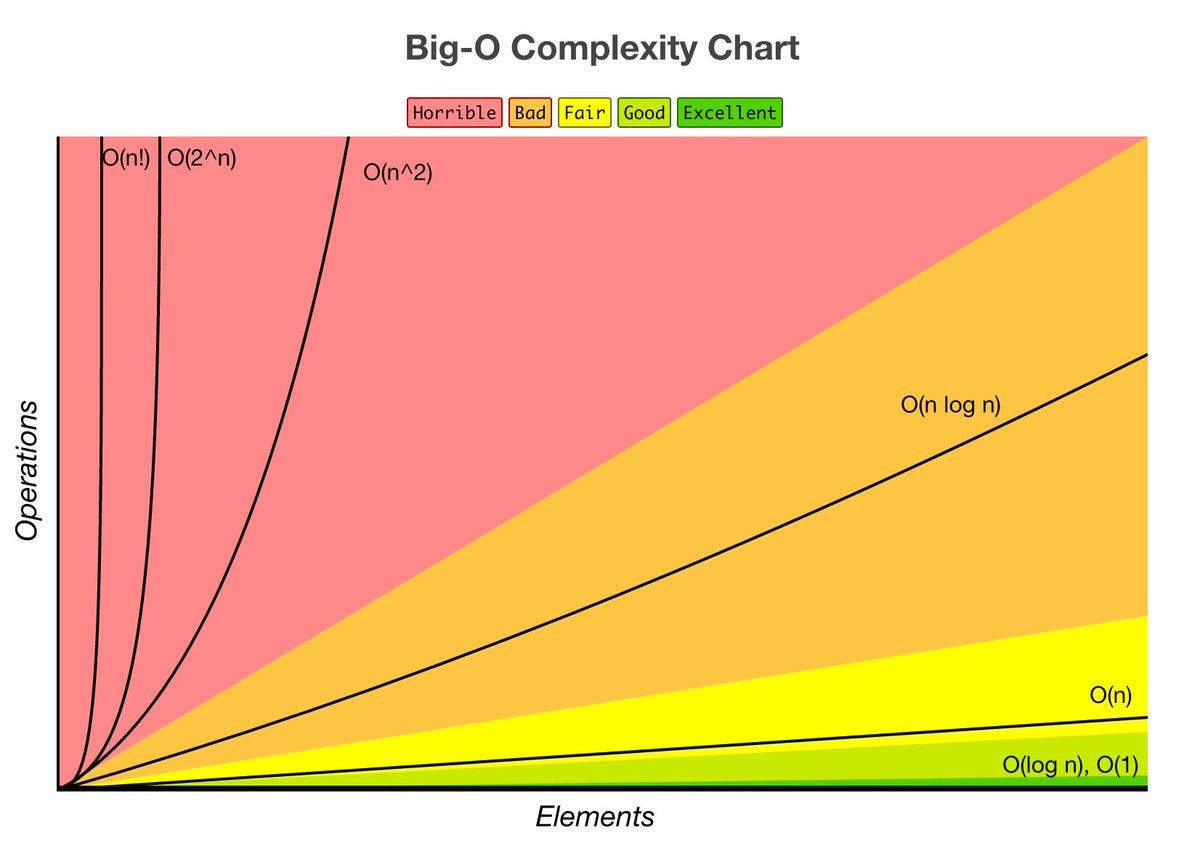
